In [1]:
import torch, json, wandb, argparse
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from ultralytics.nn.tasks import DetectionModel
from utils import get_image_id

# libraries that are monkey patched
import ultralytics.nn.tasks as tasks
import ultralytics.utils.torch_utils as torch_utils
from ultralytics.data.augment import Albumentations
from ultralytics.models.yolo.detect.train import DetectionTrainer
from yolov8_monkey_patches import albumentation_init, load_model_custom, get_flops_pass, parse_dcn_model

In [2]:
# monkey patches
Albumentations.__init__ = albumentation_init
DetectionTrainer.get_model = load_model_custom
tasks.parse_model = parse_dcn_model
torch_utils.get_flops = get_flops_pass

In [3]:
train_args = dict(model="yolov8x_dcn.yaml", data="fisheye.yaml",
                  device=0, epochs=1, batch=4, fraction=0.1, imgsz=1280,
                  exist_ok=True,
                  conf=0.5, iou=0.5,
                  optimizer="auto", seed=0,
                  box=7.5, cls=0.5, dfl=1.5,
                  lr0=0.01,
                  close_mosaic=0,
                  degrees=0.0, translate=0.1, scale=0.5, shear=0.0,
                  perspective=0.0, flipud=0.0, fliplr=0.5, 
                  mosaic=0.0, mixup=0.0,
                  deterministic=True, verbose=True,
                  pretrained=True)

trainer = DetectionTrainer(overrides=train_args)

Ultralytics YOLOv8.1.19 🚀 Python-3.10.13 torch-2.2.0 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)
engine/trainer: task=detect, mode=train, model=yolov8x_dcn.yaml, data=fisheye.yaml, epochs=1, time=None, patience=100, batch=4, imgsz=1280, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=0.1, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.5, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

In [4]:
trainer.train()

TensorBoard: Start with 'tensorboard --logdir /usr/src/ultralytics/runs/detect/train', view at http://localhost:6006/


wandb: Currently logged in as: g1y5x3. Use `wandb login --relogin` to force relogin



                   from  n    params  module                                       arguments                     
  0                  -1  1      3049  utils.DeformableConv                         [3, 80, 3, 2]                 
  1                  -1  1    134960  utils.DeformableConv                         [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640

train: Scanning /workspace/FishEye8k/dataset/Fisheye8K_all_including_train/train/labels.cache... 529 images, 0 backgrounds, 0 corrupt: 100%|██████████| 529/529 [00:00<?, ?it/s]


albumentations: ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8)), RandomBrightnessContrast(p=0.01, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True), RandomGamma(p=0.01, gamma_limit=(80, 120))


val: Scanning /workspace/FishEye8k/dataset/Fisheye8K_all_including_train/test/labels.cache... 2712 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2712/2712 [00:00<?, ?it/s]


Plotting labels to /usr/src/ultralytics/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 97 weight(decay=0.0), 108 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: WARNING ⚠️ TensorBoard graph visualization failure Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument min in method wrapper_CUDA_clamp_Tensor)
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to /usr/src/ultralytics/runs/detect/train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/133 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/autograd/__init__.py:266: UserWarning: compute_grad_input does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1704987394225/work/aten/src/ATen/Context.cpp:79.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
        1/1      16.7G      1.604      1.796      1.427         18       1280: 100%|██████████| 133/133 [01:17<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [01:51<00:00,  3.03it/s]


                   all       2712      45145       0.15      0.151      0.115     0.0605

1 epochs completed in 0.055 hours.
Optimizer stripped from /usr/src/ultralytics/runs/detect/train/weights/last.pt, 136.9MB
Optimizer stripped from /usr/src/ultralytics/runs/detect/train/weights/best.pt, 136.9MB

Validating /usr/src/ultralytics/runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.19 🚀 Python-3.10.13 torch-2.2.0 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)
YOLOv8x_dcn summary (fused): 275 layers, 68148792 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [01:45<00:00,  3.23it/s]


                   all       2712      45145      0.151      0.151      0.115     0.0605
                   bus       2712        930      0.062      0.104     0.0345     0.0201
                  bike       2712      26270       0.39      0.286      0.297      0.146
                   car       2712      14113      0.201      0.249      0.184       0.11
            pedestrian       2712       2633      0.102      0.116     0.0595     0.0271
                 truck       2712       1199          0          0          0          0
Speed: 0.5ms preprocess, 32.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /usr/src/ultralytics/runs/detect/train


lr/pg0,▁
lr/pg1,▁
lr/pg2,▁
metrics/mAP50(B),▁
metrics/mAP50-95(B),▁
metrics/precision(B),▁
metrics/recall(B),▁
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▁


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

dcn1_offset_conv = trainer.model.model[0].offset_conv.weight.data.cpu().numpy()
dcn1_offset_conv.shape

(18, 3, 3, 3)

In [13]:
print(dcn1_offset_conv[0,0,:])

[[-0.00015067 -5.8196e-05  6.1181e-05]
 [ -0.0005033 -0.00047244  -0.0001424]
 [-0.00050301 -0.00049408 -0.00024172]]


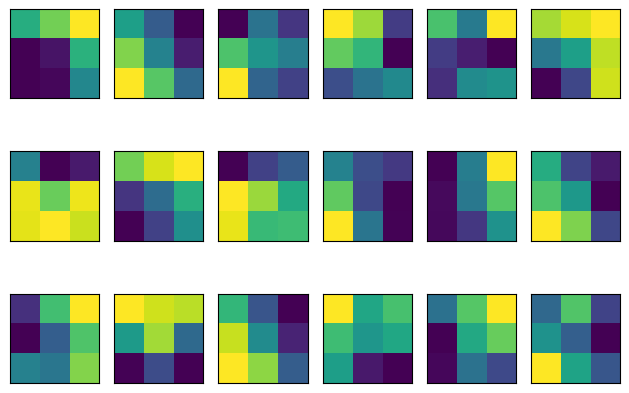

In [29]:
fig, axs = plt.subplots(3, 6)
for i in range(18):
    row = i // 6
    col = i % 6
    axs[row,col].imshow(dcn1_offset_conv[i,0,:])
    axs[row,col].get_xaxis().set_visible(False)
    axs[row,col].get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

In [36]:
valdata_iterator = iter(trainer.validator.dataloader)
batch = next(valdata_iterator)

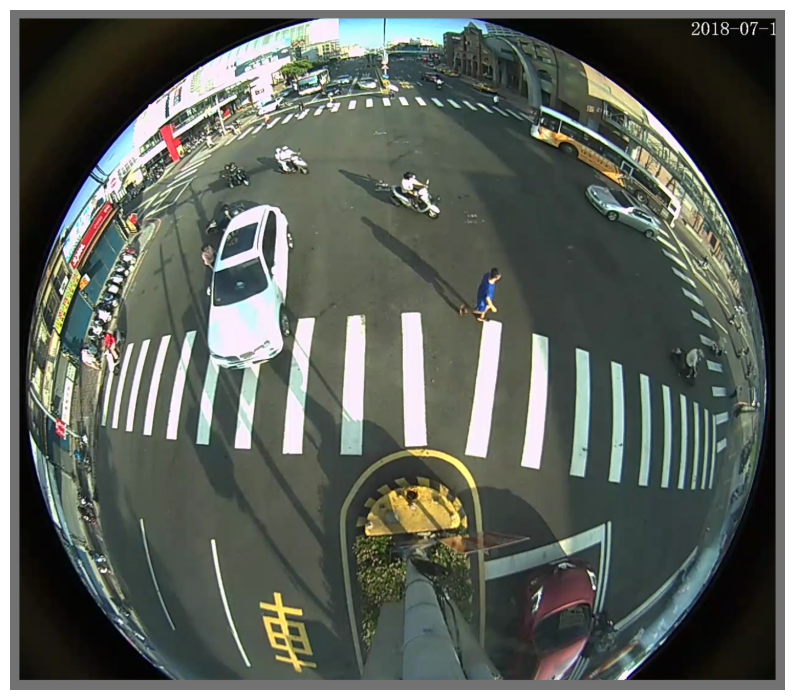

In [47]:
img = batch["img"][0]
img = img.cpu().numpy().transpose(1,2,0)
plt.figure(figsize=(10,12))
plt.imshow(img)
plt.axis("off")
plt.show()